In [1]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

Text(0.5,0,'Time [s]')

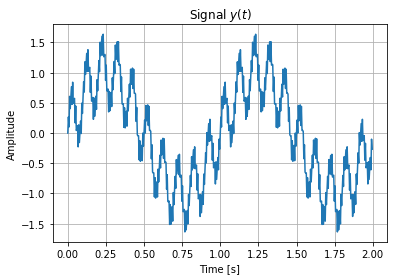

In [4]:
## Creating the signal and plotting
fs_t = 250 # [Hz]
t = np.arange(0,2,1/fs_t) # [s]
y = np.sin(t*2*np.pi) + 0.5*np.sin(t*2*np.pi*10) + 0.2*np.sin(t*2*np.pi*100)
plt.plot(t,y)
plt.grid()
plt.title("Signal $y(t)$")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")

/home/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Text(0.5,0,'Frecuencia [Hz]')

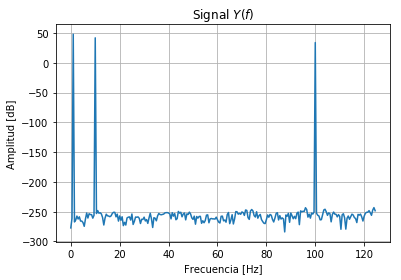

In [6]:
# Calculation of the signal spectrum
Y = np.fft.fft(y)
vf = np.arange(0,len(Y)/2)*fs_t/len(Y)
Y = Y[0:len(Y)/2]
plt.plot(vf,20 * np.log10(np.abs(Y)))
plt.grid()
plt.title("Signal $Y(f)$")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [Hz]")

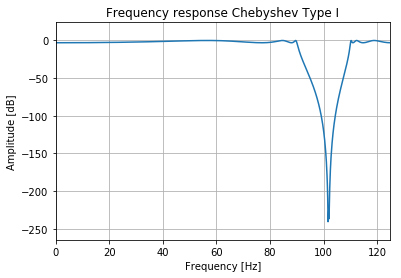

In [10]:
## Desinged the bandstop filter
Fc1 = 90  # Cutting frequency 1
Fc2 = 110  # Cutting frequency 2
sos = signal.cheby1(6,3,[Fc1*2/fs_t,Fc2*2/fs_t], 'bandstop', analog=False, output='sos')
b,a = signal.sos2tf(sos)
w, h = signal.freqz(b,a,worN=1000)
## Plotting the spectrum filter
plt.plot(w*(fs_t/(2*np.pi)), 20 * np.log10(abs(h)))
plt.title("Frequency response Chebyshev Type I")
plt.ylabel("Amplitude [dB]")
plt.xlabel("Frequency [Hz]")
plt.margins(0, 0.1)
plt.grid()

Text(0.5,0,'Time [s]')

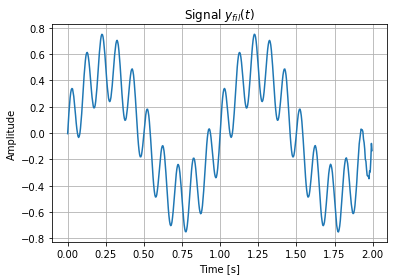

In [13]:
## Filtering signal
y_fil = signal.sosfiltfilt(sos,y)
plt.plot(t,y_fil)
plt.grid()
plt.title("Signal $y_{fil}(t)$")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")

/home/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


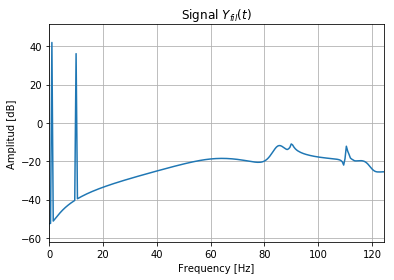

In [14]:
## Graphing the spectrum of the signal
Y_fil = np.fft.fft(y_fil)
vf = np.arange(0,len(Y_fil)/2)*fs_t/len(Y_fil)
Y_fil = Y_fil[0:len(Y_fil)/2]
plt.plot(vf,20 * np.log10(np.abs(Y_fil)))
plt.grid()
plt.title("Signal $Y_{fil}(t)$")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Frequency [Hz]")
plt.margins(0, 0.1)